In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import altair

%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
%store -r cleaned


In [2]:
cleaned = cleaned.copy()

In [3]:
cleaned.describe()

,date,Access Electricity,Cellular %,Fixed broadband %,GDP pcp PPP,Landline %,Secure Servers,Urbanisation,internet_users
count,4136.000000,3685.000000,4112.000000,4092.000000,4010.000000,4055.000000,4084.000000,4136.000000,4068.000000
mean,2005.500000,76.185665,54.696311,516.906201,14513.301732,19.028049,3195.438614,55.308416,22.646872
std,6.345056,32.351223,52.565335,961.155141,17766.001536,18.983754,25080.359814,24.174969,26.945050
min,1995.000000,0.014814,0.000000,0.000000,272.271966,0.000000,0.000000,7.211000,0.000000
25%,2000.000000,54.499317,3.795419,0.000000,2655.234687,2.727515,0.000000,34.648750,1.117758
50%,2005.500000,96.366173,41.802494,10.252366,7758.475175,12.710057,9.000000,55.259500,9.199139
75%,2011.000000,100.000000,98.313467,519.755185,20153.544633,30.301913,167.000000,74.376750,39.155608
max,2016.000000,100.000000,332.090701,6173.884929,140037.115597,110.191151,530309.000000,100.000000,98.323610


Charts to visualize: First, let's take a look at distribution of internet_users by year/country

In [4]:
cleaned.head()

country  date  Access Electricity  Cellular %  \
country     date                                                      
Afghanistan 2016  Afghanistan  2016                 NaN   66.003744   
            2015  Afghanistan  2015                 NaN   61.577682   
            2014  Afghanistan  2014           89.500000   58.845471   
            2013  Afghanistan  2013           75.154373   55.012226   
            2012  Afghanistan  2012           69.100000   51.434547   

                  Fixed broadband %  GDP pcp PPP  Landline %  Secure Servers  \
country     date                                                               
Afghanistan 2016           2.688976  1876.544682    0.348892            49.0   
            2015           2.207969  1861.124332    0.343677            46.0   
            2014           0.479532  1875.447407    0.325861            32.0   
            2013           0.490972  1877.411953    0.313466            30.0   
            2012           0.502942  1873.153946    0.301822            33.0   

                  Urbanisation  internet_users Code      Region cgroup  
country     date                                                        
Afghanistan 2016        27.132       10.595726  AFG  South Asia      L  
            2015        26.703        8.260000  AFG  South Asia      L  
            2014        26.282        7.000000  AFG  South Asia      L  
            2013        25.871        5.900000  AFG  South Asia      L  
            2012        25.468        5.454545  AFG  South Asia      L

In [5]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [6]:
cleaned['Region'].unique()

array(['South Asia', 'Europe & Central Asia', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

In [7]:
#color by region: 
# Unique category labels: 'D', 'F', 'G', ...
color_labels = cleaned['Region'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", 7)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))
color_map


{'East Asia & Pacific': (1.0, 0.85098039215686272, 0.18431372549019609),
 'Europe & Central Asia': (0.9882352941176471,
  0.55294117647058827,
  0.3843137254901961),
 'Latin America & Caribbean': (0.65098039215686276,
  0.84705882352941175,
  0.32941176470588235),
 'Middle East & North Africa': (0.55294117647058827,
  0.62745098039215685,
  0.79607843137254897),
 'North America': (0.89803921568627454,
  0.7686274509803922,
  0.58039215686274515),
 'South Asia': (0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 'Sub-Saharan Africa': (0.90588235294117647,
  0.54117647058823526,
  0.76470588235294112)}

#use ax notation to plot all the lineplots on one plot(probably not good visualization, but should be working)

fig, ax = plt.subplots()
countries = list(cleaned['country'].unique())
#cmap = get_cmap(len(countries))

for country in countries:
    df = cleaned[cleaned['country'] == country]
    ax.plot(x = df['date'], y = df['internet_users'])
    
    

In [8]:
grouped= cleaned.groupby(['date', 'Region'], as_index = False).mean()
grouped.head()

/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,date,Region,Access Electricity,Cellular %,Fixed broadband %,GDP pcp PPP,Landline %,Secure Servers,Urbanisation,internet_users
0,1995,East Asia & Pacific,68.876643,2.998685,0.0,10264.315315,15.171156,0.0,49.731581,0.577202
1,1995,Europe & Central Asia,99.135825,3.496195,0.0,12015.646587,30.824238,0.0,63.605771,1.564560
2,1995,Latin America & Caribbean,82.181742,1.057203,0.0,7198.804040,16.018257,0.0,57.329257,0.303681
3,1995,Middle East & North Africa,89.839466,1.876003,0.0,17144.040735,13.538721,0.0,72.117350,0.108584
4,1995,North America,100.000000,10.581201,0.0,27586.046263,65.032062,0.0,84.977333,6.746259


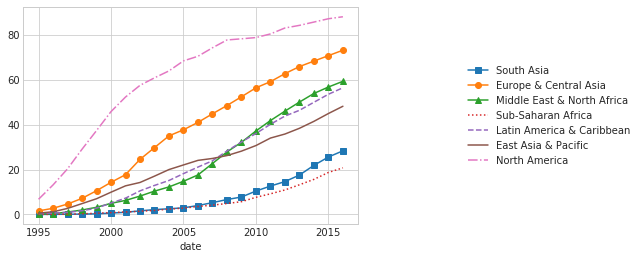

In [9]:
fig, ax = plt.subplots()
regions = list(cleaned['Region'].unique())

style={x:y for x, y in zip(regions, ['s-', 'o-', '^-', ':', '--', '-', '-.'])}

for region in regions:
    grouped.loc[grouped['Region']==region].plot(x = 'date', y='internet_users', style=style, ax = ax, label = region)
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5),
          fancybox=True, shadow=True)

In [10]:
income= cleaned.groupby(['date', 'cgroup'], as_index = False).mean()
income.head()

/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,date,cgroup,Access Electricity,Cellular %,Fixed broadband %,GDP pcp PPP,Landline %,Secure Servers,Urbanisation,internet_users
0,1995,H,99.552456,8.076767,0.0,26865.850477,46.340957,0.0,80.260842,2.849245
1,1995,L,36.306346,0.025980,0.0,1441.985264,1.735134,0.0,30.401017,0.003703
2,1995,LM,77.732349,0.368212,0.0,4618.703604,9.885122,0.0,51.647468,0.111185
3,1995,UM,92.646185,1.458603,0.0,12934.695285,20.910547,0.0,63.710963,0.424325
4,1996,H,99.585251,11.905732,0.0,27470.556251,47.766225,0.0,80.220923,5.164755


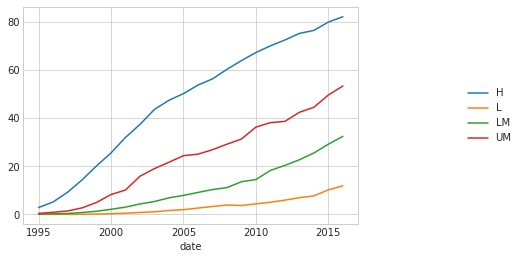

In [11]:
fig, ax = plt.subplots()
cgroups = list(income['cgroup'].unique())

for cgroup in cgroups:
    income.loc[income['cgroup'] == cgroup].plot(x = 'date', y='internet_users', ax = ax, label = cgroup)
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5),
          fancybox=True, shadow=True)

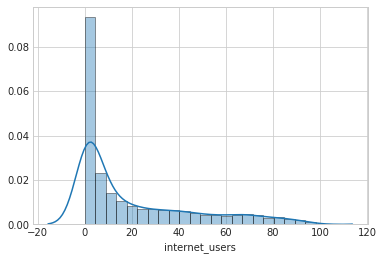

In [12]:
sns.distplot(cleaned.dropna()['internet_users'])

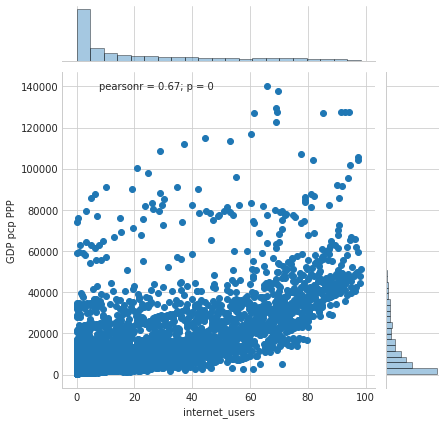

In [13]:
sns.jointplot(x = cleaned['internet_users'], y = cleaned['GDP pcp PPP'])

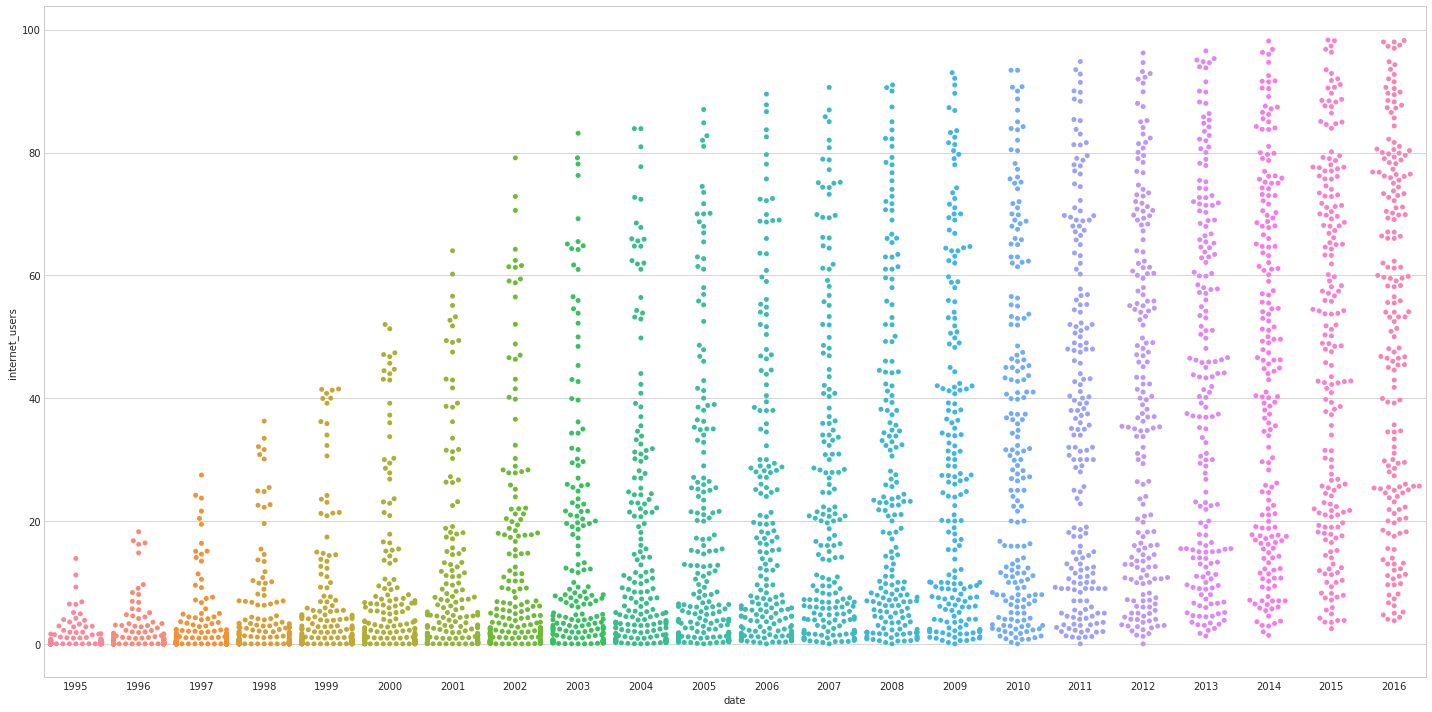

In [14]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.swarmplot(x='date', y ='internet_users', data = cleaned)
plt.tight_layout()

/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


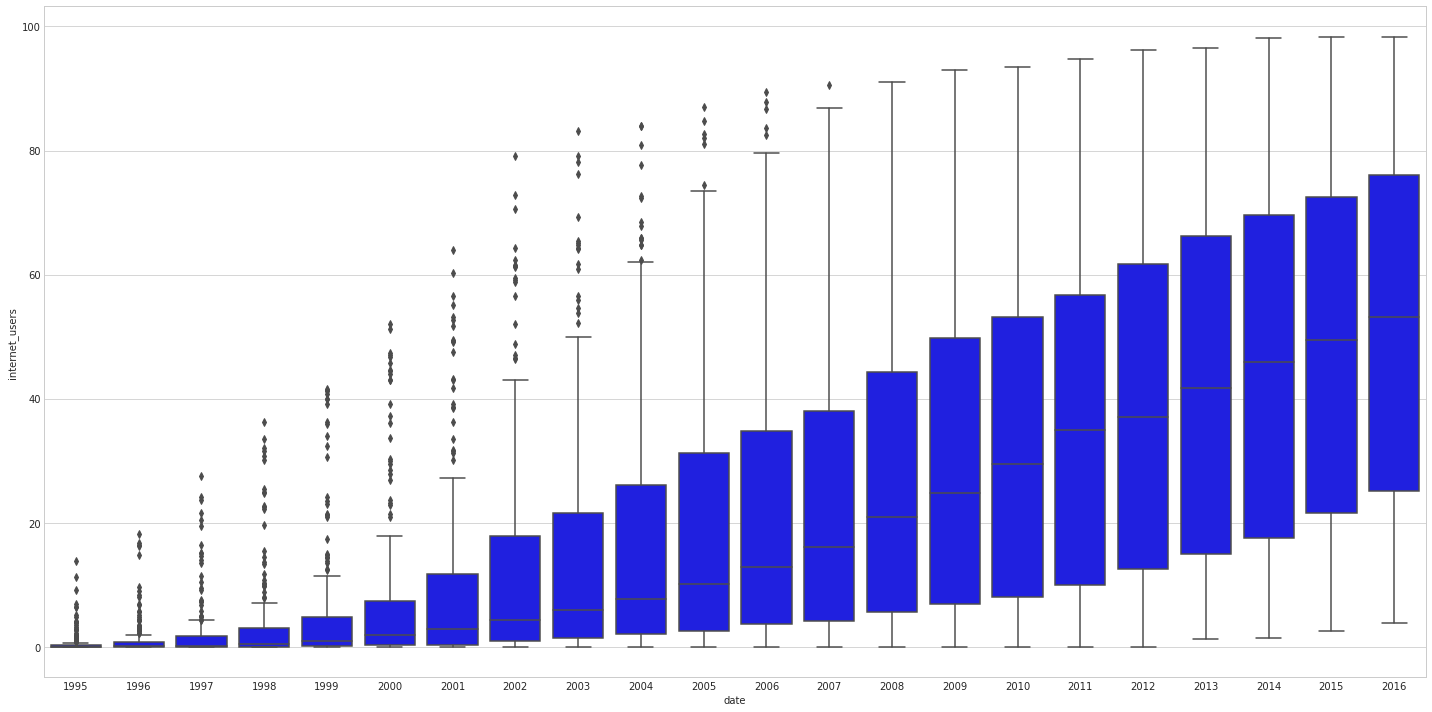

In [15]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x='date', y ='internet_users', color = 'blue', data = cleaned)
plt.tight_layout()
#fontsize larger


##pairplot cannot deal with missing values
nona = cleaned.dropna()
g = sns.PairGrid(nona[nona.columns[2:]], diag_sharey = False)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)

Specific question: Do the differences between the countries get larger?

How do I regularize this?


In [17]:
#for each year, calculate the median and mean, then visualize the difference to median and mean
nona = cleaned.dropna()
cleaned['mean_by_year'] = nona.groupby('date')['internet_users'].transform(np.mean)
cleaned['median_by_year']=cleaned.groupby('date')['internet_users'].transform(np.median)
cleaned['diff_to_median'] = cleaned['internet_users'] - cleaned['median_by_year']
cleaned['diff_to_mean'] = cleaned['internet_users'] - cleaned['mean_by_year']

/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


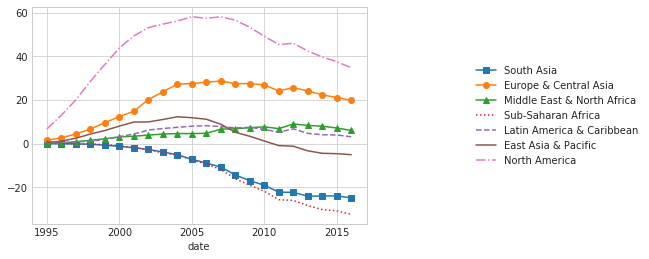

In [18]:
grouped= cleaned.groupby(['date', 'Region'], as_index = False).mean()

fig, ax = plt.subplots()
regions = list(cleaned['Region'].unique())

style={x:y for x, y in zip(regions, ['s-', 'o-', '^-', ':', '--', '-', '-.'])}

for region in regions:
    grouped.loc[grouped['Region']==region].plot(x = 'date', y='diff_to_median', style=style, ax = ax, label = region)
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5),
          fancybox=True, shadow=True)

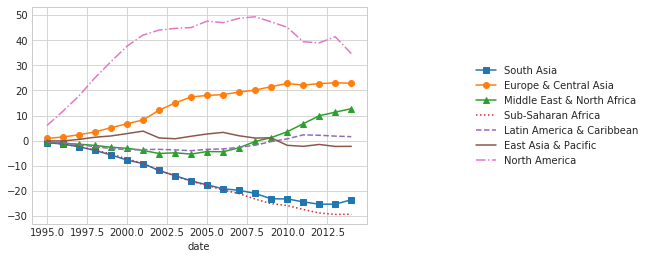

In [20]:
fig, ax = plt.subplots()

for region in regions:
    grouped.loc[grouped['Region']==region].plot(x = 'date', y='diff_to_mean', style=style, ax = ax, label = region)
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5),
          fancybox=True, shadow=True)

Now, look at aggregate 

In [33]:
cleaned['abs_diff_to_median'] = abs(cleaned['diff_to_median'])
cleaned['abs_diff_to_mean'] = abs(cleaned['diff_to_mean'])

/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  
/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


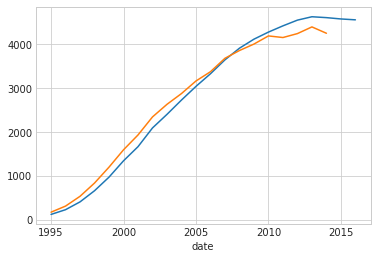

In [36]:
fig, ax = plt.subplots()
cleaned.groupby('date')['abs_diff_to_median'].sum().plot(x='date', y = 'abs_diff_to_median', style = style, ax= ax)
cleaned.groupby('date')['abs_diff_to_mean'].sum().plot(x='date', y = 'abs_diff_to_mean', style = style, ax= ax)

#regularize by mean/median


In [40]:
cleaned['reg_abs_diff_to_median'] = cleaned['abs_diff_to_median'] / cleaned['median_by_year']
cleaned['reg_abs_diff_to_mean'] = cleaned['abs_diff_to_mean'] / cleaned['mean_by_year']
cleaned.head()

country  date  Access Electricity  Cellular %  \
country     date                                                      
Afghanistan 2016  Afghanistan  2016                 NaN   66.003744   
            2015  Afghanistan  2015                 NaN   61.577682   
            2014  Afghanistan  2014           89.500000   58.845471   
            2013  Afghanistan  2013           75.154373   55.012226   
            2012  Afghanistan  2012           69.100000   51.434547   

                  Fixed broadband %  GDP pcp PPP  Landline %  Secure Servers  \
country     date                                                               
Afghanistan 2016           2.688976  1876.544682    0.348892            49.0   
            2015           2.207969  1861.124332    0.343677            46.0   
            2014           0.479532  1875.447407    0.325861            32.0   
            2013           0.490972  1877.411953    0.313466            30.0   
            2012           0.502942  1873.153946    0.301822            33.0   

                  Urbanisation  internet_users          ...          cgroup  \
country     date                                        ...                   
Afghanistan 2016        27.132       10.595726          ...               L   
            2015        26.703        8.260000          ...               L   
            2014        26.282        7.000000          ...               L   
            2013        25.871        5.900000          ...               L   
            2012        25.468        5.454545          ...               L   

                 mean_by_year median_by_year  diff_to_median  diff_to_mean  \
country     date                                                             
Afghanistan 2016          NaN      53.226475      -42.630749           NaN   
            2015          NaN      49.539876      -41.279876           NaN   
            2014    45.377626      45.875195      -38.875195    -38.377626   
            2013    42.785757      41.650000      -35.750000    -36.885757   
            2012    39.919832      36.970000      -31.515455    -34.465287   

                  abs_diff_to_medium  abs_diff_to_mean  abs_diff_to_median  \
country     date                                                             
Afghanistan 2016           42.630749               NaN           42.630749   
            2015           41.279876               NaN           41.279876   
            2014           38.875195         38.377626           38.875195   
            2013           35.750000         36.885757           35.750000   
            2012           31.515455         34.465287           31.515455   

                  reg_abs_diff_to_median  reg_abs_diff_to_mean  
country     date                                                
Afghanistan 2016                0.800931                   NaN  
            2015                0.833266                   NaN  
            2014                0.847412              0.845739  
            2013                0.858343              0.862104  
            2012                0.852460              0.863363  

[5 rows x 22 columns]

/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
/home/toni/.conda/envs/digital_divide/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


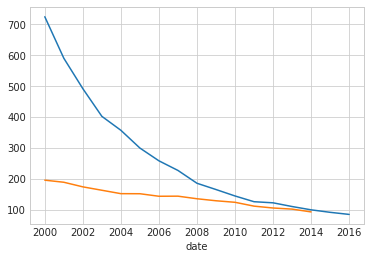

In [44]:
cleaned_late = cleaned[cleaned['date'] >= 2000]
fig, ax = plt.subplots()
#only makes sende starting in 2000
cleaned_late.groupby('date')['reg_abs_diff_to_median'].sum().plot(x='date', y = 'reg_abs_diff_to_median', style = style, ax= ax)
cleaned_late.groupby('date')['reg_abs_diff_to_mean'].sum().plot(x='date', y = 'reg_abs_diff_to_mean', style = style, ax= ax)

Difference seems to become smaller and smaller